In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('loan.csv',low_memory=False)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(2260668, 145)

In [7]:
data_null = pd.DataFrame({'Count': data.isnull().sum(), 'Percent': 100*data.isnull().sum()/len(data)})
data_null[data_null['Percent'] > 80]

,Count,Percent
id,2260668,100.000000
member_id,2260668,100.000000
url,2260668,100.000000
desc,2134601,94.423462
mths_since_last_record,1901512,84.112837
annual_inc_joint,2139958,94.660428
dti_joint,2139962,94.660605
verification_status_joint,2144938,94.880717
revol_bal_joint,2152648,95.221766
sec_app_earliest_cr_line,2152647,95.221722


In [8]:
df1 = data.dropna(axis=1, thresh=int(0.80*len(data)))

In [9]:
df1.shape

(2260668, 87)

In [10]:
df_LC = df1.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])
df_LC.dtypes

loan_amnt                int64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
dtype: object

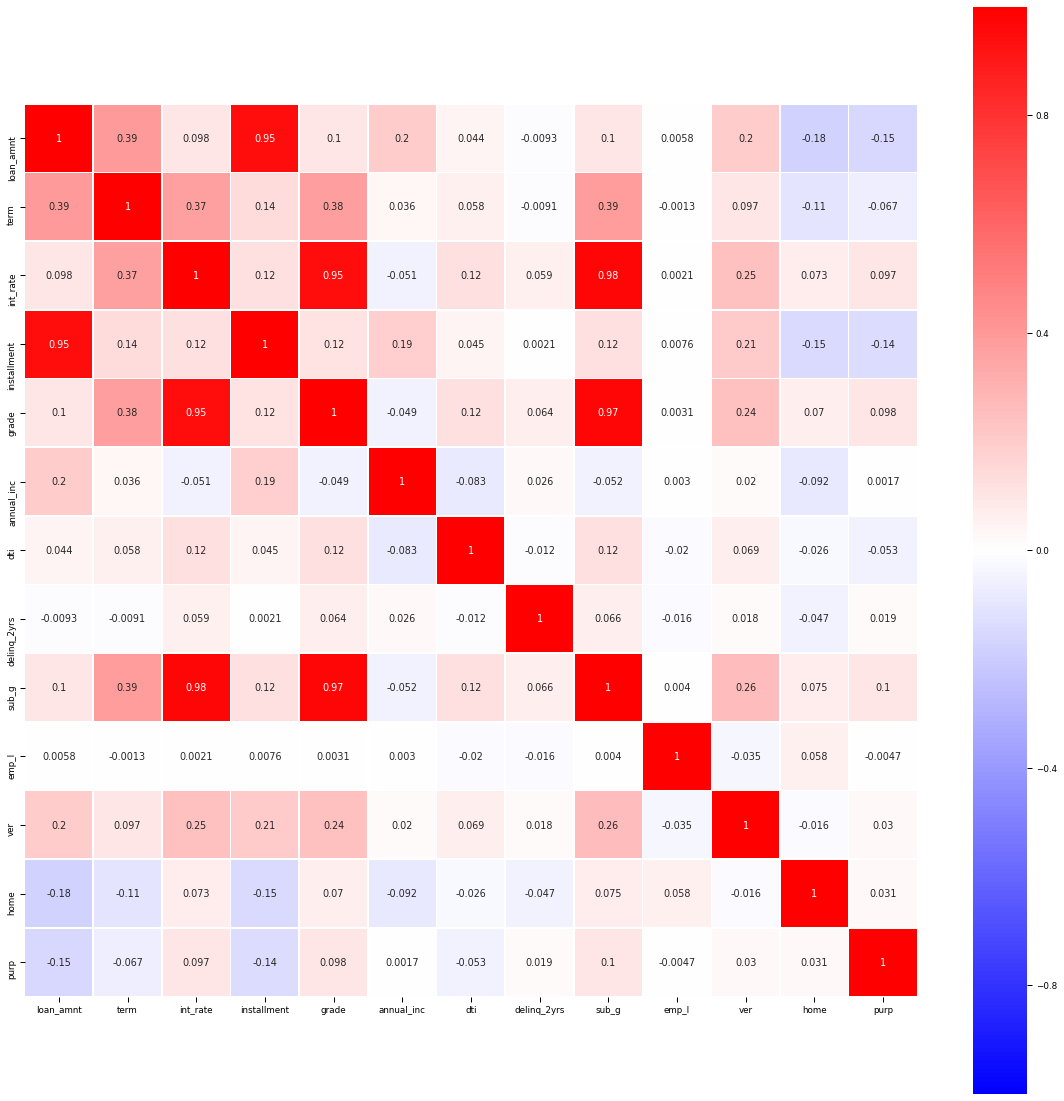

In [11]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(grade=df_LC.grade.astype('category').cat.codes,
                         sub_g=df_LC.sub_grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                        emp_l=df_LC.emp_length.astype('category').cat.codes,
                         ver =df_LC.verification_status.astype('category').cat.codes,
                        home=df_LC.home_ownership.astype('category').cat.codes,
                        purp=df_LC.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)


In [12]:
df_LC.drop(['installment','grade','sub_grade','verification_status','term'], axis=1, inplace = True)

In [13]:
dflc_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})
dflc_null[dflc_null['Count'] > 0]

,Count,Percent
emp_length,146907,6.498389
annual_inc,4,0.000177
dti,1711,0.075686
delinq_2yrs,29,0.001283


In [14]:
df_LC.dropna(axis=0)

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,2500,13.56,10+ years,RENT,55000.0,debt_consolidation,18.24,0.0,Current
1,30000,18.94,10+ years,MORTGAGE,90000.0,debt_consolidation,26.52,0.0,Current
2,5000,17.97,6 years,MORTGAGE,59280.0,debt_consolidation,10.51,0.0,Current
3,4000,18.94,10+ years,MORTGAGE,92000.0,debt_consolidation,16.74,0.0,Current
4,30000,16.14,10+ years,MORTGAGE,57250.0,debt_consolidation,26.35,0.0,Current
...,...,...,...,...,...,...,...,...,...
2260662,30000,30.75,6 years,MORTGAGE,100000.0,debt_consolidation,22.13,0.0,Current
2260663,12000,14.08,10+ years,MORTGAGE,58000.0,debt_consolidation,20.88,0.0,Current
2260664,12000,25.82,< 1 year,MORTGAGE,30000.0,debt_consolidation,19.28,3.0,Fully Paid
2260665,10000,11.99,10+ years,OWN,64000.0,debt_consolidation,12.96,0.0,Current


In [15]:
df_LC['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

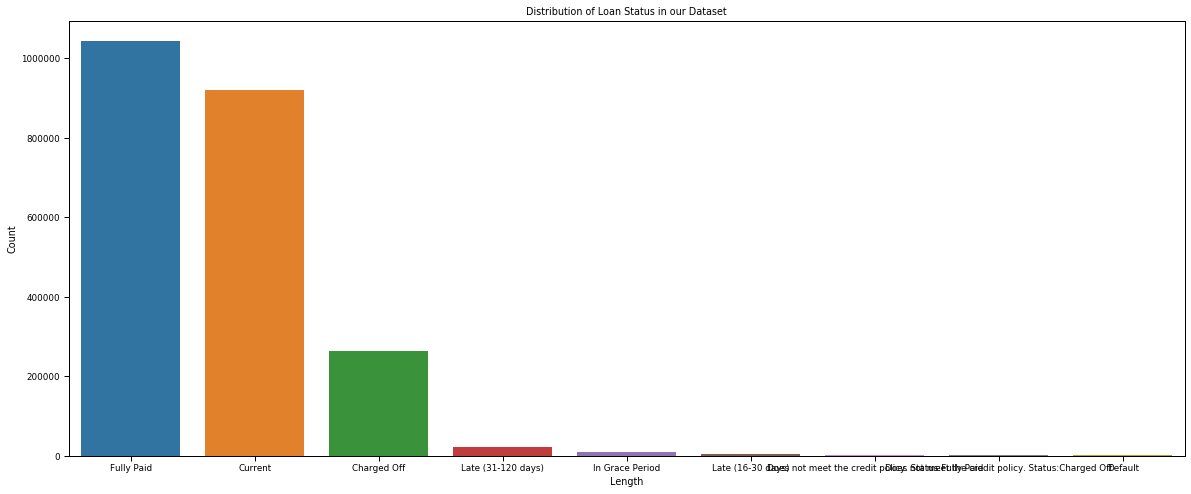

In [16]:
m =df_LC['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()

In [17]:
df_LC = df_LC[df_LC.loan_status != 'Current']
df_LC = df_LC[df_LC.loan_status != 'In Grace Period']
df_LC = df_LC[df_LC.loan_status != 'Late (16-30 days)']
df_LC = df_LC[df_LC.loan_status != 'Late (31-120 days)']
df_LC = df_LC[df_LC.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df_LC = df_LC[df_LC.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df_LC = df_LC[df_LC.loan_status != 'Issued']

In [18]:
df_LC['loan_status'] = df_LC['loan_status'].replace({'Charged Off':'Default'})
df_LC['loan_status'].value_counts()

Fully Paid    1041952
Default        261686
Name: loan_status, dtype: int64

In [19]:
df_LC.loan_status=df_LC.loan_status.astype('category').cat.codes
df_LC.delinq_2yrs=df_LC.delinq_2yrs.astype('category').cat.codes
df_LC.head()
df_LC['loan_status'].value_counts()

1    1041952
0     261686
Name: loan_status, dtype: int64

In [20]:
df_LC.dtypes

loan_amnt           int64
int_rate          float64
emp_length         object
home_ownership     object
annual_inc        float64
purpose            object
dti               float64
delinq_2yrs          int8
loan_status          int8
dtype: object

In [21]:
df_LC.isnull().any()

loan_amnt         False
int_rate          False
emp_length         True
home_ownership    False
annual_inc        False
purpose           False
dti                True
delinq_2yrs       False
loan_status       False
dtype: bool

In [22]:
df_LC['emp_length'].unique()

array(['5 years', '< 1 year', '10+ years', '3 years', '4 years', '1 year',
       '8 years', nan, '2 years', '6 years', '9 years', '7 years'],
      dtype=object)

In [23]:
df_LC.shape

(1303638, 9)

In [24]:
df_LC['emp_length'].isnull().sum()

75457

In [25]:
df_LC['emp_length'] = df_LC['emp_length'].fillna("Unknown")

In [26]:
df_LC['emp_length'].isnull().sum()

0

In [27]:
df_LC['dti'].isnull().sum()

312

In [28]:
df_LC['dti'] = df_LC['dti'].fillna(df_LC['dti'].median())

In [29]:
df_LC = pd.get_dummies(df_LC, drop_first=True)

In [30]:
traindata, testdata = train_test_split(df_LC, stratify=df_LC['loan_status'],test_size=.3, random_state=17)
testdata.reset_index(drop=True, inplace=True)
traindata.reset_index(drop=True, inplace=True)

In [30]:
y_default = traindata[traindata['loan_status'] == 0]
n_paid = traindata[traindata['loan_status'] == 1].sample(n=len(y_default), random_state=17) ##chosing equal amount of 1's

data = y_default.append(n_paid) 

In [31]:
Xbalanced = data.drop('loan_status', axis=1)
ybalanced = data['loan_status']

In [32]:
sc = StandardScaler()
numerical = Xbalanced.columns[(Xbal.dtypes == 'float64') | (Xbal.dtypes == 'int64')].tolist()
Xbalanced[numerical] = sc.fit_transform(Xbalanced[numerical])

In [33]:
X_test = testdata.drop('loan_status', axis=1)
y_test = testdata['loan_status']
numerical = X_test.columns[(X_test.dtypes == 'float64') | (X_test.dtypes == 'int64')].tolist()
X_test[numerical] = sc.fit_transform(X_test[numerical])

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xbalanced, ybalanced)
predict = model.predict(X_test)

/home/dev/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

score=accuracy_score(y_test, predict)
roc=roc_auc_score(y_test, predict)
cr=classification_report(y_test, predict)

In [51]:
score

0.6118074519550387

In [52]:
roc

0.6420665180905428

In [54]:
print(cr)

              precision    recall  f1-score   support

           0       0.30      0.69      0.42     78506
           1       0.88      0.59      0.71    312586

    accuracy                           0.61    391092
   macro avg       0.59      0.64      0.56    391092
weighted avg       0.77      0.61      0.65    391092



In [36]:
cm = confusion_matrix(y_test, predict).T
print(cm)

[[ 54375 127688]
 [ 24131 184898]]


(0.0, 2.0, 2.0, 0.0)

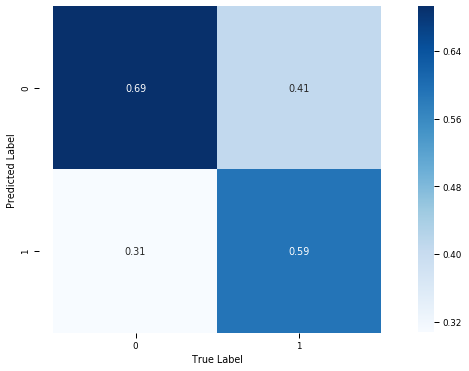

In [37]:
fig, axes = plt.subplots(figsize=(8,6))
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

In [35]:
!pip3 install imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/c8/73/36a13185c2acff44d601dc6107b5347e075561a49e15ddd4e69988414c3e/imbalanced_learn-0.6.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5e/d8/312e03adf4c78663e17d802fe2440072376fee46cada1404f1727ed77a32/scikit_learn-0.22.2.post1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/fc/4763e5f17ac6e7e7d55f377cde859ca1c5d5ac624441ab45315bc578aa9e/numpy-1.18.3-cp36-cp36m-manylinux1_x86_64.whl


In [32]:
X_train = traindata.drop('loan_status', axis=1)
y_train = traindata['loan_status']

In [33]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int8

In [ ]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=0)

columns = X_train.columns

os_data_X,os_data_y=oversampling.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("length of oversampled data is ",len(os_data_X))
print("Number of defaulter in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of non-defaulter",len(os_data_y[os_data_y['y']==1]))
print("Proportion of defaulter data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of non-defaulter data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(Xbalanced, ybalanced)
predict = model.predict(X_test)

In [56]:
score=accuracy_score(y_test, predict)
roc=roc_auc_score(y_test, predict)
cr=classification_report(y_test, predict)

In [57]:
score

0.5783882053327606

In [58]:
roc

0.6224623122712375

In [59]:
print(cr)

              precision    recall  f1-score   support

           0       0.28      0.70      0.40     78506
           1       0.88      0.55      0.68    312586

    accuracy                           0.58    391092
   macro avg       0.58      0.62      0.54    391092
weighted avg       0.76      0.58      0.62    391092



In [60]:
cm = confusion_matrix(y_test, predict).T
print(cm)

[[ 54648 141031]
 [ 23858 171555]]


(0.0, 2.0, 2.0, 0.0)

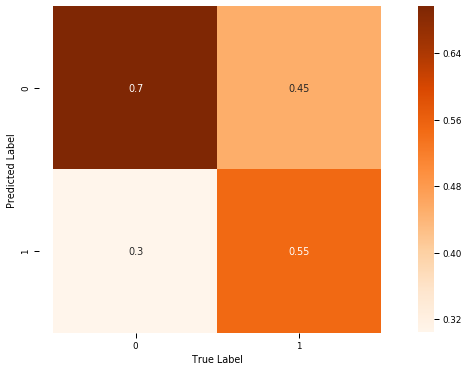

In [61]:
fig, axes = plt.subplots(figsize=(8,6))
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Oranges');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')